In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
path = os.path.abspath('../library/')
if path not in sys.path:
    sys.path.append(path)
from astropy.io import fits
from cumhpx import assess_likelihood, get_hpx_structure_for_plotting, plot_mollweide_log

We are developing here a package that tries to go to deeper healpix levels when the density of sources is higher.

First goal: get a bijective funtion from f(N_1,N_2) <--> N_3 where N_1 = healpix_level, N_2 = healpix_number, N_3 = cumulative_healpix_number, done (see cumhpx)

Second goal: a function that assigns these cumulative healpixels based on the density, e.g. via a pixel threshold, done (see assign_cumhpx)

Third goal: transfer this cumhpx structure to other catalogues. Done (see transfer_cumhpx_structure)

Fourth goal: Do statistics on the sources from the same cumhpx. Done (see hess_likelihood_per_cumhpx)

Fifth goal: Plot the results

############################################################

For comparison we download gdr2 samples and gdr2mock samples.

GDR2 ESA random index max = 1692919134

GDR2 ESA total count = 1692919135

GDR2 ESA total count for stars up to G=20.7 = 1451448033

GDR2mock random index max = 1606747035

Download sample via:

SELECT *
FROM gaiadr2.gaia_source
WHERE phot_g_mean_mag < 20.7
AND random_index < 4232298  (total stars/400)

saved to output/GDR2_207/GDR2_207_0.0025sampling.fits

AND GDR2mock
SELECT *
FROM gdr2mock.main
WHERE random_index < 4016868

saved to output/GDR2mock_207/GDR2mock_207_0.0025sampling.fits

For validation we downloaded a sample as:
SELECT * 
FROM gaiadr2.gaia_source 
WHERE phot_g_mean_mag < 20.7 
AND random_index > 4232298
AND random_index < 2*4232298
AND phot_bp_mean_mag IS NOT NULL
AND phot_rp_mean_mag IS NOT NULL
AND parallax IS NOT NULL

and saved it to output/GDR2_207/GDR2_207_0.0025sampling_cleaned_validation.fits

4088180 4016868 3134770
4088180 4016868 3134770
data already has cumhpx structure
likelihood:  -752292.5990511904 new -674189.6729603927 old
assess_likelihood took 149.9 seconds
get_hpx_structure_for_plotting took 9.0 seconds


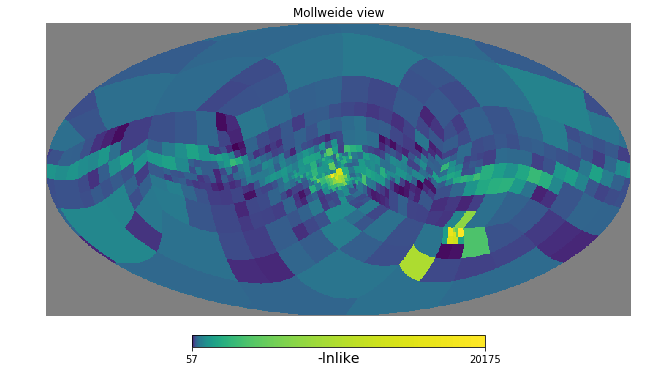

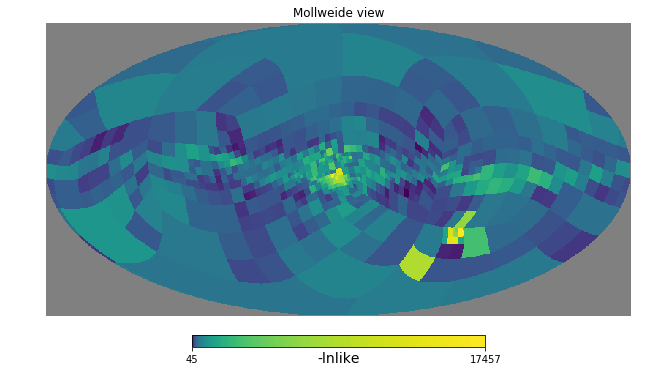

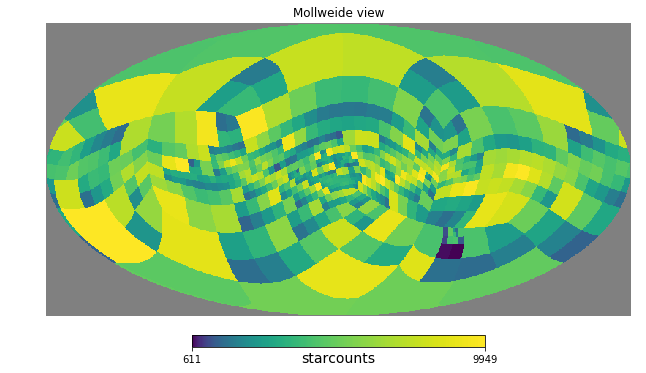

In [3]:
# Load the data and downsample
new = fits.getdata("../output/mock_cat_old_gdr3_isochrones_00025_sampling/GDR2mock_20.7Gmag.fits")
data = fits.getdata("../output/GDR2_207/GDR2_207_cleaned_0.0025sampling.fits")
old = fits.getdata("../output/GDR2mock_207/GDR2mock_207_0.0025sampling.fits")
print(len(new),len(old), len(data))
downsampling = 1
new = new[::downsampling]
data = data[::downsampling]
old = old[::downsampling]
print(len(new),len(old), len(data))
start = time.time()

data, cumhpx_like_new = assess_likelihood(data,new, threshold = 10000, cmd_bins = 5)
data, cumhpx_like_old = assess_likelihood(data,old, threshold = 10000, cmd_bins = 5)
t1 = time.time()
print('likelihood: ', sum(cumhpx_like_new),'new',sum(cumhpx_like_old), 'old')
hpx_like, hpx_dens = get_hpx_structure_for_plotting(cumhpx_like_new,data)
hpx_like_old, hpx_dens_old = get_hpx_structure_for_plotting(cumhpx_like_old,data)
t2 = time.time()
# looks good. now plotting
print('assess_likelihood took %.1f seconds' %((t1-start)/2))
print('get_hpx_structure_for_plotting took %.1f seconds' %((t2-t1)/2))

plot_mollweide_log(-1*hpx_like,'-lnlike')
plot_mollweide_log(-1*hpx_like_old,'-lnlike')
# Should be the same
plot_mollweide_log(hpx_dens, 'starcounts')

In [4]:
"""
## Nested healpix resolution of GAIA
healpix_resolution = 4096
#phi = x['glon'] * np.pi/180.
#theta = (90.- x['glat']) * np.pi/180.
number = ang2pix(healpix_resolution,x['ra'],x['dec'], nest = True, lonlat = True)
number = number.view(np.int64)
number *= 34359738368
x = append_fields(x,'source_id',number,usemask = False)
print('calculated healpix')
"""

"\n## Nested healpix resolution of GAIA\nhealpix_resolution = 4096\n#phi = x['glon'] * np.pi/180.\n#theta = (90.- x['glat']) * np.pi/180.\nnumber = ang2pix(healpix_resolution,x['ra'],x['dec'], nest = True, lonlat = True)\nnumber = number.view(np.int64)\nnumber *= 34359738368\nx = append_fields(x,'source_id',number,usemask = False)\nprint('calculated healpix')\n"